In [175]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [176]:
import pandas as pd
import numpy as np


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine Learning/Real_Breast_Cancer_Data/BRCA.csv")


In [177]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [178]:
df.tail(10)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
331,TCGA-A1-A0SG,61.0,FEMALE,-0.71947,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79.0,FEMALE,0.47940,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead
333,TCGA-B6-A40B,76.0,FEMALE,-0.24427,0.92556,-0.41823,-0.067848,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,05-Jan-21,Dead
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [179]:
# check NaN
df_nan= df.isna()
df_sum_nan = df_nan.sum()
df_sum_nan

Patient_ID             7
Age                    7
Gender                 7
Protein1               7
Protein2               7
Protein3               7
Protein4               7
Tumour_Stage           7
Histology              7
ER status              7
PR status              7
HER2 status            7
Surgery_type           7
Date_of_Surgery        7
Date_of_Last_Visit    24
Patient_Status        20
dtype: int64

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

#delete rows have nan values

In [181]:
df.dropna(inplace=True)

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 317 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          317 non-null    object 
 1   Age                 317 non-null    float64
 2   Gender              317 non-null    object 
 3   Protein1            317 non-null    float64
 4   Protein2            317 non-null    float64
 5   Protein3            317 non-null    float64
 6   Protein4            317 non-null    float64
 7   Tumour_Stage        317 non-null    object 
 8   Histology           317 non-null    object 
 9   ER status           317 non-null    object 
 10  PR status           317 non-null    object 
 11  HER2 status         317 non-null    object 
 12  Surgery_type        317 non-null    object 
 13  Date_of_Surgery     317 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      317 non-null    object 
dtypes: float

In [183]:
df['Gender'].replace(['FEMALE','MALE'],[0,1], inplace=True)

In [184]:
df['Patient_Status'].replace(['Alive','Dead'],[1,0], inplace=True)

In [185]:
df['Tumour_Stage'].replace(['I','II', 'III'],[1,2,3], inplace=True)

In [186]:
df['ER status'].replace(['Positive','Negative'],[1,0], inplace=True)
df['PR status'].replace(['Positive','Negative'],[1,0], inplace=True)
df['HER2 status'].replace(['Positive','Negative'],[1,0], inplace=True)

In [187]:
df['Histology'].replace(['Infiltrating Ductal Carcinoma','Infiltrating Lobular Carcinoma', 'Mucinous Carcinoma'],[1,2,3], inplace=True)

In [188]:
df['Surgery_type'].replace(['Modified Radical Mastectomy','Lumpectomy','Simple Mastectomy','Other'],[0,1,2,3], inplace=True)

In [189]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0,0.080353,0.42638,0.54715,0.273680,3,1,1,1,0,0,15-Jan-17,19-Jun-17,1
1,TCGA-EW-A1OX,43.0,0,-0.420320,0.57807,0.61447,-0.031505,2,3,1,1,0,1,26-Apr-17,09-Nov-18,0
2,TCGA-A8-A079,69.0,0,0.213980,1.31140,-0.32747,-0.234260,3,1,1,1,0,3,08-Sep-17,09-Jun-18,1
3,TCGA-D8-A1XR,56.0,0,0.345090,-0.21147,-0.19304,0.124270,2,1,1,1,0,0,25-Jan-17,12-Jul-17,1
4,TCGA-BH-A0BF,56.0,0,0.221550,1.90680,0.52045,-0.311990,2,1,1,1,0,3,06-May-17,27-Jun-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36.0,0,0.231800,0.61804,-0.55779,-0.517350,3,1,1,1,1,2,11-Nov-19,09-Feb-20,0
330,TCGA-A8-A085,44.0,1,0.732720,1.11170,-0.26952,-0.354920,2,2,1,1,0,3,01-Nov-19,04-Mar-20,0
331,TCGA-A1-A0SG,61.0,0,-0.719470,2.54850,-0.15024,0.339680,2,1,1,1,0,1,11-Nov-19,18-Jan-21,0
332,TCGA-A2-A0EU,79.0,0,0.479400,2.05590,-0.53136,-0.188480,1,1,1,1,1,1,21-Nov-19,19-Feb-21,0


In [190]:
df.head(20)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0,0.080353,0.426380,0.547150,0.273680,3,1,1,1,0,0,15-Jan-17,19-Jun-17,1
1,TCGA-EW-A1OX,43.0,0,-0.420320,0.578070,0.614470,-0.031505,2,3,1,1,0,1,26-Apr-17,09-Nov-18,0
2,TCGA-A8-A079,69.0,0,0.213980,1.311400,-0.327470,-0.234260,3,1,1,1,0,3,08-Sep-17,09-Jun-18,1
3,TCGA-D8-A1XR,56.0,0,0.345090,-0.211470,-0.193040,0.124270,2,1,1,1,0,0,25-Jan-17,12-Jul-17,1
4,TCGA-BH-A0BF,56.0,0,0.221550,1.906800,0.520450,-0.311990,2,1,1,1,0,3,06-May-17,27-Jun-19,0
5,TCGA-AO-A1KQ,84.0,1,-0.081872,1.724100,-0.057335,0.043025,3,1,1,1,0,0,18-Sep-17,15-Nov-21,1
6,TCGA-D8-A73X,53.0,0,-0.069535,1.418300,-0.361050,0.391580,2,1,1,1,0,2,04-Feb-17,07-Feb-18,1
8,TCGA-EW-A1P5,77.0,0,-0.151750,-0.663320,1.189400,0.217180,2,1,1,1,0,0,28-Sep-17,28-Sep-18,1
9,TCGA-A8-A09A,40.0,0,-0.565700,1.266800,-0.293460,0.193950,2,2,1,1,1,3,14-Feb-17,15-Dec-17,1
10,TCGA-S3-A6ZG,71.0,0,-0.223050,0.505940,-0.349430,-0.835300,2,1,1,1,0,1,26-May-17,19-Dec-17,1


In [191]:
df.tail(20)

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
313,TCGA-AR-A2LN,65.0,0,-0.091334,0.054757,0.034648,-0.588830,2,1,1,1,0,3,12-Sep-19,13-Feb-21,1
314,TCGA-LD-A66U,44.0,0,0.891850,0.444400,0.110200,0.156850,2,1,1,1,0,0,22-Sep-19,31-May-20,1
315,TCGA-E2-A156,61.0,0,-0.405920,2.751300,-0.595420,0.816390,1,1,1,1,0,1,12-Sep-19,05-Jan-21,1
316,TCGA-AO-A0JJ,54.0,0,-1.231300,-0.767670,0.861600,0.239050,2,2,1,1,0,0,22-Sep-19,15-Feb-21,1
317,TCGA-E2-A14Z,64.0,0,0.975800,2.484700,-0.513320,0.666980,1,1,1,1,0,1,02-Oct-19,03-Feb-21,1
318,TCGA-A2-A0SU,66.0,0,-0.370430,1.918500,-0.796080,-0.062903,2,2,1,1,0,2,22-Sep-19,08-Sep-20,1
319,TCGA-A7-A13G,79.0,0,-1.062200,1.166400,-0.655650,-0.092381,2,2,1,1,0,2,02-Oct-19,27-Apr-20,1
320,TCGA-BH-A0BR,59.0,0,0.452300,1.395900,-0.230840,0.796310,1,2,1,1,0,3,12-Oct-19,19-Jan-21,1
322,TCGA-BH-A0HU,52.0,0,0.240800,1.734800,0.331090,1.044100,1,1,1,1,0,3,12-Oct-19,07-Nov-20,1
323,TCGA-AO-A1KP,77.0,0,0.339120,1.319300,0.587400,0.351920,2,1,1,1,0,2,22-Oct-19,09-Feb-21,1


In [192]:
df11 = df.head(11)
df11

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,0,0.080353,0.42638,0.547150,0.273680,3,1,1,1,0,0,15-Jan-17,19-Jun-17,1
1,TCGA-EW-A1OX,43.0,0,-0.420320,0.57807,0.614470,-0.031505,2,3,1,1,0,1,26-Apr-17,09-Nov-18,0
2,TCGA-A8-A079,69.0,0,0.213980,1.31140,-0.327470,-0.234260,3,1,1,1,0,3,08-Sep-17,09-Jun-18,1
3,TCGA-D8-A1XR,56.0,0,0.345090,-0.21147,-0.193040,0.124270,2,1,1,1,0,0,25-Jan-17,12-Jul-17,1
4,TCGA-BH-A0BF,56.0,0,0.221550,1.90680,0.520450,-0.311990,2,1,1,1,0,3,06-May-17,27-Jun-19,0
5,TCGA-AO-A1KQ,84.0,1,-0.081872,1.72410,-0.057335,0.043025,3,1,1,1,0,0,18-Sep-17,15-Nov-21,1
6,TCGA-D8-A73X,53.0,0,-0.069535,1.41830,-0.361050,0.391580,2,1,1,1,0,2,04-Feb-17,07-Feb-18,1
8,TCGA-EW-A1P5,77.0,0,-0.151750,-0.66332,1.189400,0.217180,2,1,1,1,0,0,28-Sep-17,28-Sep-18,1
9,TCGA-A8-A09A,40.0,0,-0.565700,1.26680,-0.293460,0.193950,2,2,1,1,1,3,14-Feb-17,15-Dec-17,1
10,TCGA-S3-A6ZG,71.0,0,-0.223050,0.50594,-0.349430,-0.835300,2,1,1,1,0,1,26-May-17,19-Dec-17,1


In [193]:
temp = df11.iloc[:,[1,3,4,5,15]]
temp

,Age,Protein1,Protein2,Protein3,Patient_Status
0,36.0,0.080353,0.42638,0.547150,1
1,43.0,-0.420320,0.57807,0.614470,0
2,69.0,0.213980,1.31140,-0.327470,1
3,56.0,0.345090,-0.21147,-0.193040,1
4,56.0,0.221550,1.90680,0.520450,0
5,84.0,-0.081872,1.72410,-0.057335,1
6,53.0,-0.069535,1.41830,-0.361050,1
8,77.0,-0.151750,-0.66332,1.189400,1
9,40.0,-0.565700,1.26680,-0.293460,1
10,71.0,-0.223050,0.50594,-0.349430,1


#===============================
#===============================

In [194]:
len(df)

317

In [195]:
np.unique(df['Patient_Status'])

array([0, 1])

In [196]:
label = df['Patient_Status'].value_counts()
label

1    255
0     62
Name: Patient_Status, dtype: int64

#Pie chart

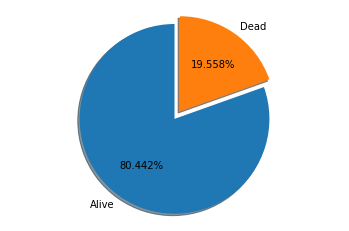

In [197]:
from matplotlib import pyplot as plt

name_labels = 'Alive', 'Dead'
sizes = [label[1],label[0]]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()

ax1.pie(sizes, explode=explode, labels=name_labels, autopct='%1.3f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

In [198]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


from sklearn.naive_bayes import GaussianNB


X = df.iloc[:,1:12]
y = df.Patient_Status
# hold out
from sklearn.model_selection import train_test_split

A=[]
B=[]
lb = np.unique(df['Patient_Status'])

for i in range(10):
  print("\n==========================")
  print("\nLẦN ",i+1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 100+i) 
  
  #Kiểm tra phân phối của 2 lớp tập train.
  train_lb = y_train.value_counts()
  print("Phân phối của 2 lớp trong tập train:\n",train_lb)

  #Cân bằng dữ liệu bằng SMOTE
  smt = SMOTE(random_state=102)
  X_train, y_train = smt.fit_resample(X_train, y_train)

  print("Dữ liệu tập train sau khi cân bằng:")
  unique, counts = np.unique(y_train, return_counts=True)
  print(dict(zip(unique, counts)))

  #Kiểm tra phân phối của 2 lớp tập test.
  test_lb = y_test.value_counts()
  print("Phân phối của 2 lớp trong tập test:\n",test_lb)


  #DecisionTreeClassifier
  model1 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=18,max_depth=7)
  model1.fit(X_train, y_train)
  #GaussianNB
  model2 = GaussianNB()
  model2.fit(X_train, y_train)
  #predict
  y_pred1 = model1.predict(X_test) 
  y_pred2 = model2.predict(X_test) 
  #print(y_test) 
  #print(y_pred)
  #accuracy

  ######################## Decision Tree
  print("\n**Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: %.3f" % round(accuracy_score(y_test, y_pred1)*100,2))
  A.append(round(accuracy_score(y_test, y_pred1)*100,2))

  #Độ chính xác cho từng phần lớp
  confu_matrix = confusion_matrix(y_test, y_pred1, labels=lb)
  s_confu = confusion_matrix(y_test, y_pred1, labels=lb).sum(axis = 1, keepdims=True)
  normal_confu_matrix = confu_matrix/s_confu
  print("+Độ chính xác cho từng phân lớp")
  print("Phân lớp 1:", round(normal_confu_matrix[1][1],3)*100)
  print("Phân lớp 0:", round(normal_confu_matrix[0][0],3)*100)

  ####################### Naive bayes
  print("\n**Do chinh xac cua mo hinh GaussianNB voi nghi thuc kiem tra hold-out:             %.3f" % round(accuracy_score(y_test, y_pred2)*100,2))
  B.append(round(accuracy_score(y_test, y_pred2)*100,2))

  #Độ chính xác cho từng phần lớp
  confu_matrix = confusion_matrix(y_test, y_pred2, labels=lb)
  s_confu = confusion_matrix(y_test, y_pred2, labels=lb).sum(axis = 1, keepdims=True)
  normal_confu_matrix = confu_matrix/s_confu
  print("+Độ chính xác cho từn phân lớp")
  print("Phân lớp 1:", round(normal_confu_matrix[1][1]*100,3))
  print("Phân lớp 0:", round(normal_confu_matrix[0][0]*100,3))





LẦN  1
Phân phối của 2 lớp trong tập train:
 1    178
0     43
Name: Patient_Status, dtype: int64
Dữ liệu tập train sau khi cân bằng:
{0: 178, 1: 178}
Phân phối của 2 lớp trong tập test:
 1    77
0    19
Name: Patient_Status, dtype: int64

**Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: 58.330
+Độ chính xác cho từng phân lớp
Phân lớp 1: 70.1
Phân lớp 0: 10.5

**Do chinh xac cua mo hinh GaussianNB voi nghi thuc kiem tra hold-out:             37.500
+Độ chính xác cho từn phân lớp
Phân lớp 1: 27.273
Phân lớp 0: 78.947


LẦN  2
Phân phối của 2 lớp trong tập train:
 1    176
0     45
Name: Patient_Status, dtype: int64
Dữ liệu tập train sau khi cân bằng:
{0: 176, 1: 176}
Phân phối của 2 lớp trong tập test:
 1    79
0    17
Name: Patient_Status, dtype: int64

**Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: 54.170
+Độ chính xác cho từng phân lớp
Phân lớp 1: 55.7
Phân lớp 0: 47.099999999999994

**Do chinh xac cua mo hinh Ga

In [199]:
tb1=0
tb2=0
for i in range(10):
  tb1+=A[i]
  tb2+=B[i]

print("Cay quyet dinh :", round(tb1/10,3))
print("Navie Bayes :", round(tb2/10,3))

Cay quyet dinh : 54.999
Navie Bayes : 41.458


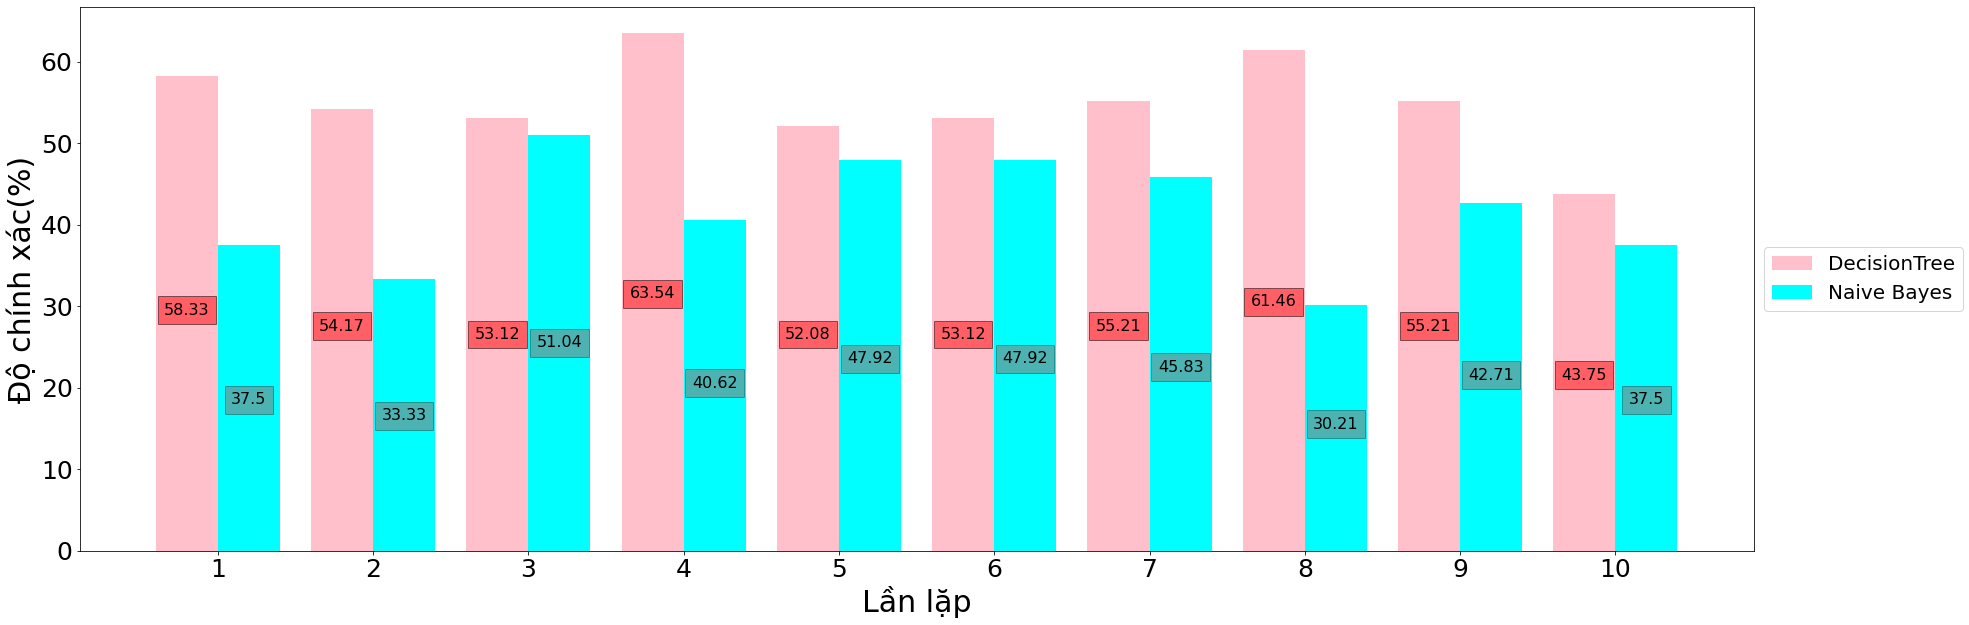

In [200]:
loop = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
decisiontree = [A[0], A[1], A[2], A[3], A[4], A[5], A[6], A[7], A[8], A[9]]
nb = [B[0], B[1], B[2], B[3], B[4], B[5], B[6], B[7], B[8], B[9]]

plt.figure(figsize=(30,10))
index = np.arange(10)
width = 0.4
plt.bar(index, decisiontree, width, color = 'pink', label = 'DecisionTree')
plt.bar(index+width, nb, width, color = 'cyan', label = 'Naive Bayes')

def addlabels(x,y):
    for i in range(len(loop)):
        plt.text(i, y[i]//2, y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.5), fontsize=16)

def addlabels2(x,y):
    for i in range(len(loop)):
        plt.text(i+width, y[i]//2, y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.3), fontsize=16)
        
addlabels(index, decisiontree)

addlabels2(index+width, nb)


plt.ylabel('Độ chính xác(%)', fontsize=30)
plt.xlabel('Lần lặp',fontsize =30)
plt.xticks(index + width/2, loop, fontsize=25)
plt.yticks(fontsize=25)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 20})

plt.show()

#===============================
#===============================

# Train với ít thuộc tính hơn: Age, gender, pro1, pro2, pro3, pro4

In [201]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

from sklearn.naive_bayes import GaussianNB


X = df.iloc[:,[1,3,4,5]]
y = df.Patient_Status
# hold out
from sklearn.model_selection import train_test_split

A=[]
B=[]
lb = np.unique(df['Patient_Status'])

for i in range(10):
  print("\n==========================")
  print("\nLẦN ",i+1)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 100+i) 
  
  #Kiểm tra phân phối của 2 lớp tập train.
  train_lb = y_train.value_counts()
  print("Phân phối của 2 lớp trong tập train:\n",train_lb)

  #Cân bằng dữ liệu bằng SMOTE
  smt = SMOTE(random_state=102)
  X_train, y_train = smt.fit_resample(X_train, y_train)

  print("Dữ liệu tập train sau khi cân bằng:")
  unique, counts = np.unique(y_train, return_counts=True)
  print(dict(zip(unique, counts)))

  #Kiểm tra phân phối của 2 lớp tập test.
  test_lb = y_test.value_counts()
  print("Phân phối của 2 lớp trong tập test:\n",test_lb)

  #DecisionTreeClassifier
  model1 = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=18,max_depth=7)
  model1.fit(X_train, y_train)
  #GaussianNB
  model2 = GaussianNB()
  model2.fit(X_train, y_train)
  #predict
  y_pred1 = model1.predict(X_test) 
  y_pred2 = model2.predict(X_test) 
  #print(y_test) 
  #print(y_pred)
  #accuracy

  ######################## Decision Tree
  print("\n**Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: %.3f" % round(accuracy_score(y_test, y_pred1)*100,2))
  A.append(round(accuracy_score(y_test, y_pred1)*100,2))

  #Độ chính xác cho từng phần lớp
  confu_matrix = confusion_matrix(y_test, y_pred1, labels=lb)
  s_confu = confusion_matrix(y_test, y_pred1, labels=lb).sum(axis = 1, keepdims=True)
  normal_confu_matrix = confu_matrix/s_confu
  print("+Độ chính xác cho từng phân lớp")
  print("Phân lớp 1:", round(normal_confu_matrix[1][1],3)*100)
  print("Phân lớp 0:", round(normal_confu_matrix[0][0],3)*100)

  ####################### Naive bayes
  print("\n**Do chinh xac cua mo hinh GaussianNB voi nghi thuc kiem tra hold-out:             %.3f" % round(accuracy_score(y_test, y_pred2)*100,2))
  B.append(round(accuracy_score(y_test, y_pred2)*100,2))

  #Độ chính xác cho từng phần lớp
  confu_matrix = confusion_matrix(y_test, y_pred2, labels=lb)
  s_confu = confusion_matrix(y_test, y_pred2, labels=lb).sum(axis = 1, keepdims=True)
  normal_confu_matrix = confu_matrix/s_confu
  print("+Độ chính xác cho từn phân lớp")
  print("Phân lớp 1:", round(normal_confu_matrix[1][1]*100,3))
  print("Phân lớp 0:", round(normal_confu_matrix[0][0]*100,3))





LẦN  1
Phân phối của 2 lớp trong tập train:
 1    178
0     43
Name: Patient_Status, dtype: int64
Dữ liệu tập train sau khi cân bằng:
{0: 178, 1: 178}
Phân phối của 2 lớp trong tập test:
 1    77
0    19
Name: Patient_Status, dtype: int64

**Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: 59.380
+Độ chính xác cho từng phân lớp
Phân lớp 1: 57.099999999999994
Phân lớp 0: 68.4

**Do chinh xac cua mo hinh GaussianNB voi nghi thuc kiem tra hold-out:             54.170
+Độ chính xác cho từn phân lớp
Phân lớp 1: 49.351
Phân lớp 0: 73.684


LẦN  2
Phân phối của 2 lớp trong tập train:
 1    176
0     45
Name: Patient_Status, dtype: int64
Dữ liệu tập train sau khi cân bằng:
{0: 176, 1: 176}
Phân phối của 2 lớp trong tập test:
 1    79
0    17
Name: Patient_Status, dtype: int64

**Do chinh xac cua mo hinh DecisionTreeClassifier voi nghi thuc kiem tra hold-out: 54.170
+Độ chính xác cho từng phân lớp
Phân lớp 1: 59.5
Phân lớp 0: 29.4

**Do chinh xac cua mo hinh Ga

In [202]:
tb1=0
tb2=0
for i in range(10):
  tb1+=A[i]
  tb2+=B[i]

print("Cay quyet dinh :", round(tb1/10,3))
print("Navie Bayes :", round(tb2/10,3))

Cay quyet dinh : 49.481
Navie Bayes : 48.647


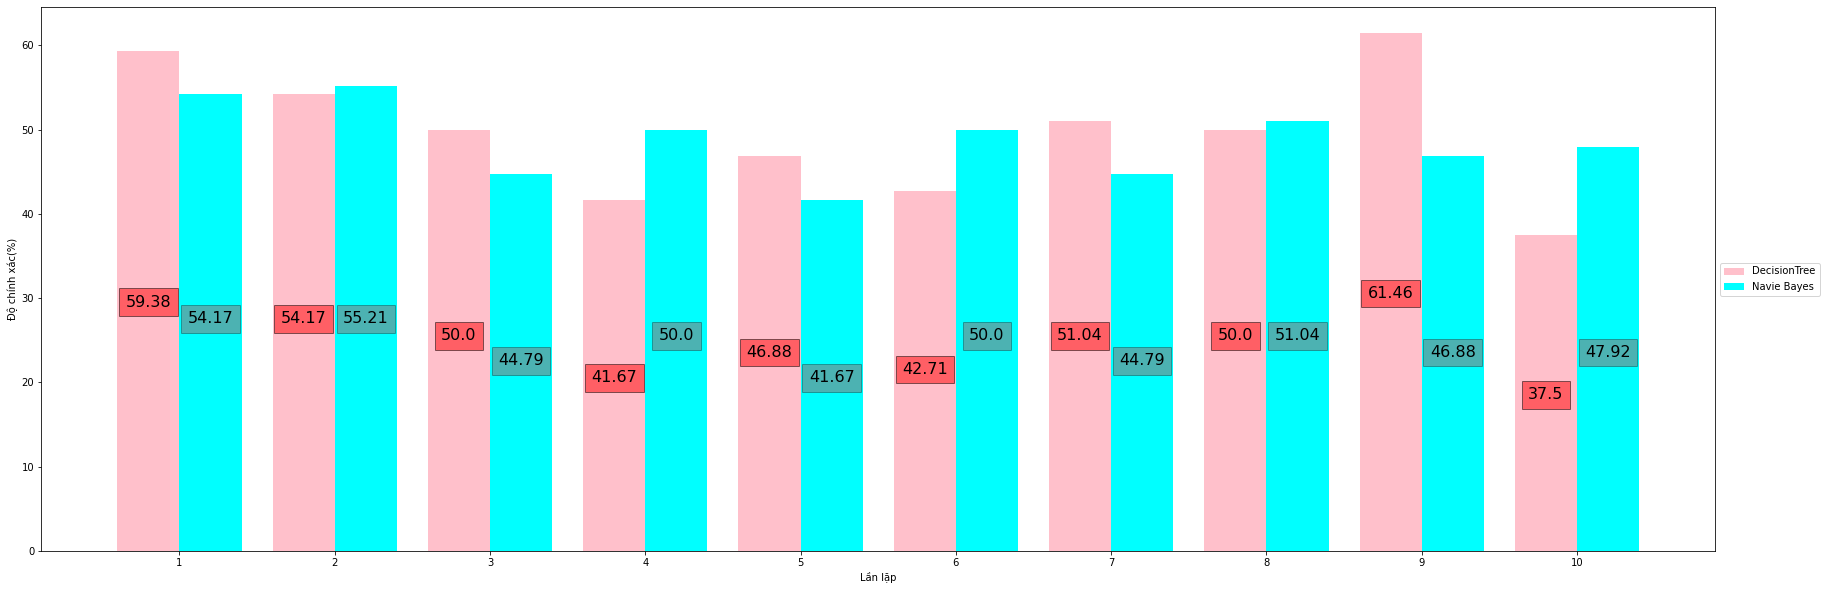

In [203]:
loop = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
decisiontree = [A[0], A[1], A[2], A[3], A[4], A[5], A[6], A[7], A[8], A[9]]
nb = [B[0], B[1], B[2], B[3], B[4], B[5], B[6], B[7], B[8], B[9]]

plt.figure(figsize=(30,10))
index = np.arange(10)
width = 0.4
plt.bar(index, decisiontree, width, color = 'pink', label = 'DecisionTree')
plt.bar(index+width, nb, width, color = 'cyan', label = 'Navie Bayes')

def addlabels(x,y):
    for i in range(len(loop)):
        plt.text(i, y[i]//2, y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.5), fontsize=16)

def addlabels2(x,y):
    for i in range(len(loop)):
        plt.text(i+width, y[i]//2, y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.3), fontsize=16)
        
addlabels(index, decisiontree)

addlabels2(index+width, nb)


plt.ylabel('Độ chính xác(%)')
plt.xlabel('Lần lặp')
plt.xticks(index + width/2, loop)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#VỚI DỮ LIỆU SỬ DỤNG 12 THUỘC TÍNH ĐỂ TRAINING SẼ CHO KẾT QUẢ DỰ ĐOÁN CỦA MÔ HÌNH NAIVE BAYES THẤP HƠN NHIỀU SO VỚI CÂY QUYẾT ĐỊNH
Cay quyet dinh : 54.999
Navie Bayes : 41.458

#CÒN VỚI DỮ LIỆU SỬ DỤNG ít thuộc tính hơn, cụ thể là Age, gender, pro1, pro2, pro3, pro4 ĐỂ TRAINING THÌ SẼ CHO KẾT QUẢ DỰ ĐOÁN CỦA MÔ HÌNH NAIVE BAYES XẤP XỈ SO VỚI MÔ HÌNH CÂY QUYẾT ĐỊNH
Cay quyet dinh : 49.481
Navie Bayes : 48.647